In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

import pickle

### 1. The Data

In [61]:
# url: https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre
# directory: C:/Users/kharm/OneDrive/Documents/Syracuse/Spring 2022/IST 707/Final Project
rawdata = pd.read_csv("music_genre.csv")
rawdata.shape

(50005, 18)

In [62]:
rawdata.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [63]:
rawdata.describe() #raw data summary statistics; need to remove instance_id and add tempo

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [64]:
for col in rawdata.columns:
    if sum(rawdata[col].isna()) != 0: #scanning for NAs
        print(col + " has NA values.")
if sum(rawdata.duplicated()) != 0: #scanning for duplicates
    print("The data set has duplicates.")

instance_id has NA values.
artist_name has NA values.
track_name has NA values.
popularity has NA values.
acousticness has NA values.
danceability has NA values.
duration_ms has NA values.
energy has NA values.
instrumentalness has NA values.
key has NA values.
liveness has NA values.
loudness has NA values.
mode has NA values.
speechiness has NA values.
tempo has NA values.
obtained_date has NA values.
valence has NA values.
music_genre has NA values.
The data set has duplicates.


In [65]:
rawdata[rawdata["instance_id"].isna() == True]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
rawdata[10000:10005] #checking the na indices

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
data = rawdata.drop([10000,10001,10002,10003,10004]) #dropping each of the nas
data = data.reset_index().drop(columns = "index") #resetting the index (0-50000)
data.shape

(50000, 18)

In [68]:
for col in data.columns:
    if sum(data[col].isna()) != 0: #scanning for nas
        print(col + " has NA values.")
if sum(data.duplicated()) != 0: #scanning for duplicates
    print("The data set has duplicates.")

Now, all NA's are removed. The only duplicates recorded were the the NA values, so they do not need to filtered either. Aside from NA values, the duration_ms column has -1 inputs (which does not make sense for time input). Furthermore, tempo is a non-numeric and has recorded values of 0 (which is also not possible). Next, these anomoly will be analyzed.

In [69]:
#tempo
tempo = data["tempo"]
tempo.head(10) #non-numeric with '?' inputs

0               100.889
1    115.00200000000001
2               127.994
3               128.014
4               145.036
5                     ?
6               149.995
7               120.008
8    149.94799999999998
9               139.933
Name: tempo, dtype: object

In [70]:
tempo[tempo == "?"] = 0 #setting the '?' to 0 placeholder
tempoadj = tempo.astype(float) #converting to float
data.drop(columns = "tempo")
data["tempo"] = tempoadj #updating the tempo column
data.head(10)

C:\Users\kharm\AppData\Local\Temp/ipykernel_18596/1158334300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempo[tempo == "?"] = 0 #setting the '?' to 0 placeholder


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.1240,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,0.000,4-Apr,0.614,Electronic
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.1060,-4.294,Major,0.3510,149.995,4-Apr,0.230,Electronic
7,30738.0,Hraach,Delirio,43.0,0.02970,0.809,416132.0,0.706,0.903000,G,0.0635,-9.339,Minor,0.0484,120.008,4-Apr,0.761,Electronic
8,84950.0,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,F,0.1780,-3.175,Minor,0.2680,149.948,4-Apr,0.273,Electronic
9,56950.0,Shlump,Lazer Beam,22.0,0.00934,0.578,204800.0,0.731,0.011200,A,0.1110,-7.091,Minor,0.1730,139.933,4-Apr,0.203,Electronic


In [71]:
artist_avg = data[data["tempo"] != 0].groupby("artist_name").agg("mean") #aggregated table grouped by artists to view artist averages
for a in range(data.shape[0]):
    if data["tempo"][a] == 0: #scanning for all 0 instances
        if data["artist_name"][a] in data[data["tempo"] != 0]["artist_name"]: #seeing if song artist has an average
            data["tempo"][a] = artist_avg["tempo"][data["artist_name"][a]] #setting the song tempo to artist average
        else: #if artist does not have given average
            data["tempo"][a] = np.mean(data[data["tempo"] != 0]["tempo"]) #setting song to average tempo of entire data set
    else:
        pass
data.head(10)

C:\Users\kharm\AppData\Local\Temp/ipykernel_18596/1097954964.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tempo"][a] = np.mean(data[data["tempo"] != 0]["tempo"]) #setting song to average tempo of entire data set


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889000,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.1240,-7.043,Minor,0.0300,115.002000,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994000,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014000,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036000,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,119.952961,4-Apr,0.614,Electronic
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.1060,-4.294,Major,0.3510,149.995000,4-Apr,0.230,Electronic
7,30738.0,Hraach,Delirio,43.0,0.02970,0.809,416132.0,0.706,0.903000,G,0.0635,-9.339,Minor,0.0484,120.008000,4-Apr,0.761,Electronic
8,84950.0,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,F,0.1780,-3.175,Minor,0.2680,149.948000,4-Apr,0.273,Electronic
9,56950.0,Shlump,Lazer Beam,22.0,0.00934,0.578,204800.0,0.731,0.011200,A,0.1110,-7.091,Minor,0.1730,139.933000,4-Apr,0.203,Electronic


In [72]:
#duration_ms
data[data["duration_ms"] == -1][data["popularity"] > 80] #viewing some songs with -1 duration

C:\Users\kharm\AppData\Local\Temp/ipykernel_18596/243454109.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["duration_ms"] == -1][data["popularity"] > 80] #viewing some songs with -1 duration


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
25031,79152.0,empty_field,No Brainer,84.0,0.07330,0.552,-1.0,0.760,0.000000,C,0.0865,-4.706,Major,0.3420,135.702,5-Apr,0.639,Rap
25453,70337.0,Trippie Redd,Topanga,83.0,0.00587,0.755,-1.0,0.615,0.000002,E,0.1090,-8.245,Major,0.0454,105.955,4-Apr,0.039,Rap
28166,80507.0,Travis Scott,YOSEMITE,87.0,0.28300,0.785,-1.0,0.554,0.000003,C,0.1160,-6.571,Major,0.0409,128.047,4-Apr,0.144,Rap
28560,86527.0,empty_field,The Hills,82.0,0.06710,0.580,-1.0,0.565,0.000000,C,0.1350,-7.065,Minor,0.0488,112.986,4-Apr,0.138,Rap
29134,47181.0,Travis Scott,goosebumps,86.0,0.08470,0.841,-1.0,0.728,0.000000,G,0.1490,-3.370,Major,0.0484,130.049,4-Apr,0.430,Rap
38063,76480.0,Eagles,Hotel California - Eagles 2013 Remaster,83.0,0.00574,0.579,-1.0,0.508,0.000494,D,0.0575,-9.484,Major,0.0270,147.125,4-Apr,0.609,Rock
38815,44193.0,Queen,Don't Stop Me Now - Remastered,81.0,0.04880,0.559,-1.0,0.855,0.000681,F,0.6800,-5.077,Major,0.1860,156.311,4-Apr,0.605,Rock
45149,21991.0,Mustard,Pure Water (with Migos),91.0,0.17200,0.680,-1.0,0.559,0.000000,C,0.3180,-5.545,Major,0.1290,202.006,4-Apr,0.137,Hip-Hop
45573,48077.0,Aminé,REEL IT IN,83.0,0.07300,0.754,-1.0,0.342,0.000000,A#,0.1930,-8.677,Minor,0.0991,128.981,4-Apr,0.423,Hip-Hop
48173,20713.0,French Montana,Unforgettable,85.0,0.02930,0.726,-1.0,0.769,0.010100,F#,0.1040,-5.043,Major,0.1230,97.985,4-Apr,0.733,Hip-Hop


To put this in perspective, audiophile paradise list Hotel California by the Eagles (index 38068) as 368000 ms while it is listed as -1 here.

In [73]:
len(data[data["duration_ms"] == -1]) #nearly 5000 observations with no information

4939

In [74]:
data[data['artist_name'] == 'Travis Scott'] #viewing Travis Scott songs

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
25073,47029.0,Travis Scott,Maria I'm Drunk (feat. Justin Bieber & Young T...,68.0,0.37700,0.648,349933.0,0.631,0.000000,E,0.1200,-5.662,Minor,0.1030,105.989000,4-Apr,0.1420,Rap
25224,69040.0,Travis Scott,through the late night,72.0,0.36000,0.744,286236.0,0.589,0.000000,F,0.1190,-1.218,Minor,0.0359,127.051000,4-Apr,0.2420,Rap
25450,78285.0,Travis Scott,ASTROTHUNDER,75.0,0.14200,0.700,142969.0,0.460,0.000048,E,0.1110,-8.111,Minor,0.0661,151.901000,4-Apr,0.2860,Rap
25736,88507.0,Travis Scott,HOUSTONFORNICATION,76.0,0.09850,0.689,217828.0,0.723,0.000000,C,0.1580,-4.052,Minor,0.0836,160.042000,4-Apr,0.2880,Rap
26106,63564.0,Travis Scott,5% TINT,74.0,0.17300,0.712,196138.0,0.481,0.000000,E,0.2410,-5.415,Minor,0.0487,140.000000,4-Apr,0.0620,Rap
26229,69095.0,Travis Scott,3500 (feat. Future & 2 Chainz),68.0,0.11400,0.773,461840.0,0.595,0.000002,G#,0.1300,-6.062,Minor,0.1610,123.968000,4-Apr,0.3380,Rap
26231,41675.0,Travis Scott,R.I.P. SCREW,75.0,0.38900,0.607,185610.0,0.609,0.000016,C,0.1110,-5.978,Minor,0.2910,74.946000,4-Apr,0.5560,Rap
26317,66877.0,Travis Scott,first take,63.0,0.01500,0.423,313909.0,0.536,0.000000,G,0.0950,-3.800,Major,0.1600,71.313000,5-Apr,0.0895,Rap
26318,80368.0,Travis Scott,sdp interlude,62.0,0.59900,0.507,191623.0,0.586,0.054400,C,0.1180,-8.150,Minor,0.0586,108.164000,4-Apr,0.5880,Rap
26444,24799.0,Travis Scott,Pray 4 Love (feat. The Weeknd),64.0,0.20000,0.629,307000.0,0.578,0.000000,C#,0.1510,-4.704,Major,0.0428,79.940000,4-Apr,0.2110,Rap


In [75]:
artist_avg = data[data["duration_ms"] != -1].groupby("artist_name").agg("mean") #reseting artist average based on duration
for a in range(data.shape[0]): #similar procedure to tempo
    if data["duration_ms"][a] == -1:
        if data["artist_name"][a] in data[data["duration_ms"] != -1]["artist_name"]:
            data["duration_ms"][a] = artist_avg["duration_ms"][data["artist_name"][a]]
        else:
            data["duration_ms"][a] = np.mean(data[data["duration_ms"] != -1]["duration_ms"])
data.head()

C:\Users\kharm\AppData\Local\Temp/ipykernel_18596/420626407.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["duration_ms"][a] = np.mean(data[data["duration_ms"] != -1]["duration_ms"])


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,245503.541466,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.000000,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.000000,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.000000,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.000000,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [76]:
data["music_genre"].value_counts() #checking genre counts

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

In [77]:
data.drop(columns = "instance_id").describe().drop("count") #finalized summary statistics

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,44.220420,0.306383,0.558241,2.455035e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,119.952961,0.456264
std,15.542008,0.341340,0.178632,1.057864e+05,0.264559,0.325409,0.161637,6.162990,0.101373,29.075697,0.247119
min,0.000000,0.000000,0.059600,1.550900e+04,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,34.000000,0.020000,0.442000,1.948750e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,96.775750,0.257000
50%,45.000000,0.144000,0.568000,2.360270e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,119.952961,0.448000
75%,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,139.468250,0.648000
max,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


# 2. Preliminary Plots

In [78]:
#predictor variables
X = data[["popularity","acousticness","danceability", "duration_ms", "energy", "instrumentalness","liveness","loudness","speechiness","tempo","valence"]]
#dependent variable: genre
y = data["music_genre"]

X.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,27.0,0.00468,0.652,245503.541466,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759
1,31.0,0.01270,0.622,218293.000000,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531
2,28.0,0.00306,0.620,215613.000000,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333
3,34.0,0.02540,0.774,166875.000000,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270
4,32.0,0.00465,0.638,222369.000000,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323


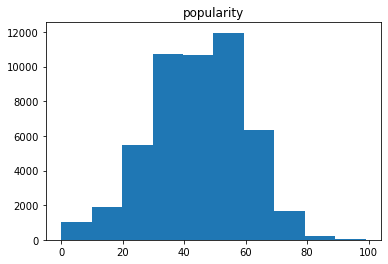

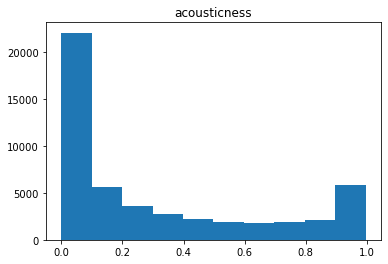

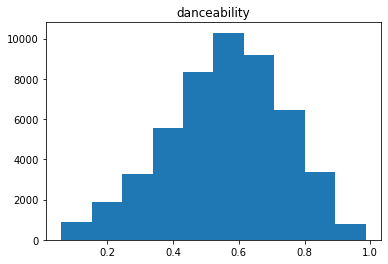

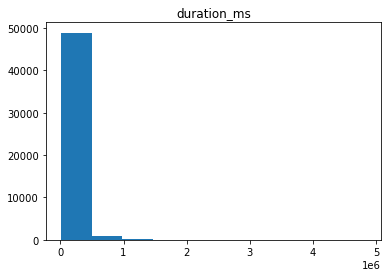

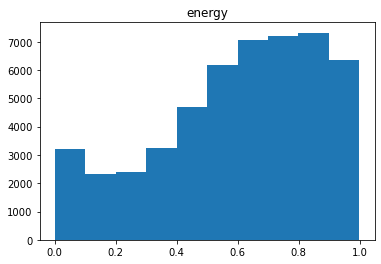

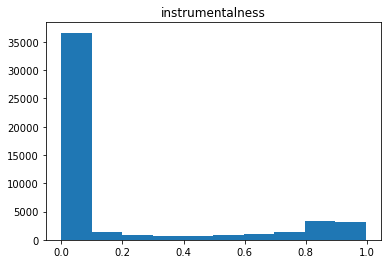

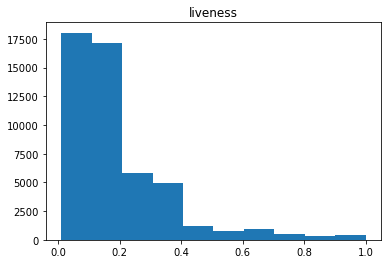

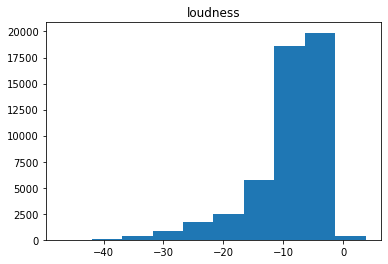

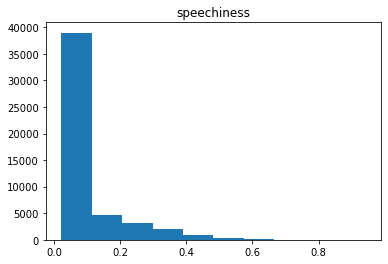

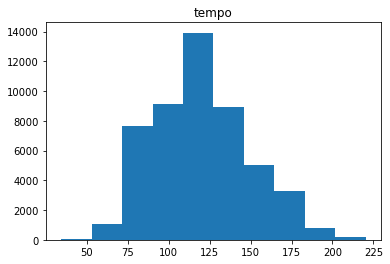

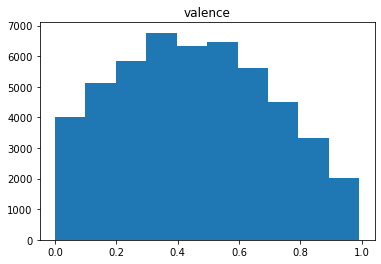

In [79]:
#sns.pairplot(X)

#looking over histogram distributions
for col in X.columns:
    plt.figure()
    plt.hist(X[col])
    plt.title(col)

In [80]:
summarydata = X

In [81]:
summarydata["genre"] = y
summarydata.groupby("genre").agg("mean") #looking at averages by genre

C:\Users\kharm\AppData\Local\Temp/ipykernel_18596/1169180834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summarydata["genre"] = y


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
genre,,,,,,,,,,,
Alternative,50.2242,0.164983,0.541124,234513.353772,0.710880,0.060818,0.197119,-6.517714,0.088819,122.285214,0.447513
Anime,24.2716,0.286968,0.471002,232105.558623,0.664568,0.278057,0.193444,-7.963515,0.064608,126.111168,0.437670
Blues,34.8040,0.317830,0.529243,253016.834906,0.609753,0.094134,0.233206,-9.009528,0.062157,121.228699,0.580788
Classical,29.3158,0.869139,0.306560,303104.910538,0.176534,0.600692,0.161046,-21.586253,0.051575,105.643167,0.210523
Country,46.0100,0.268827,0.577316,219713.715480,0.638903,0.005320,0.187781,-7.297150,0.049032,123.390426,0.536732
Electronic,38.1118,0.121971,0.619220,268269.121906,0.738636,0.348139,0.209782,-7.034238,0.098891,125.292162,0.389884
Hip-Hop,58.3996,0.179093,0.717373,222455.390864,0.644334,0.010836,0.200870,-6.851158,0.207044,120.134821,0.474927
Jazz,40.9286,0.494564,0.584736,262495.598222,0.474847,0.354271,0.171721,-11.185364,0.073629,112.490105,0.509248
Rap,60.4974,0.169057,0.696605,221648.457046,0.651301,0.009084,0.198035,-6.668337,0.186707,120.522753,0.454999


In [82]:
X = X.drop(columns = "genre")

C:\Users\kharm\AppData\Local\Temp/ipykernel_18596/3527495445.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,10))


<Figure size 1008x720 with 0 Axes>

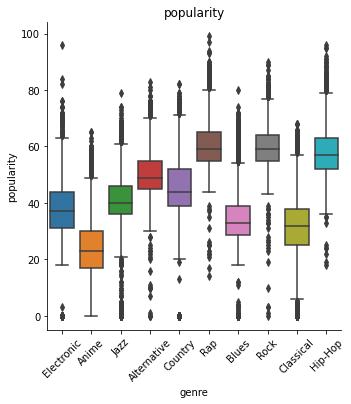

<Figure size 1008x720 with 0 Axes>

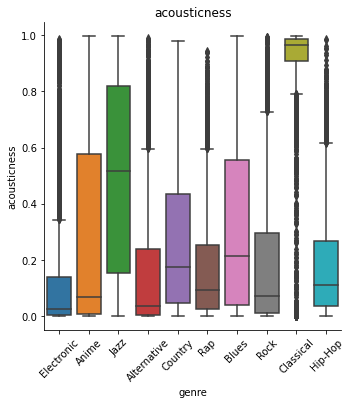

<Figure size 1008x720 with 0 Axes>

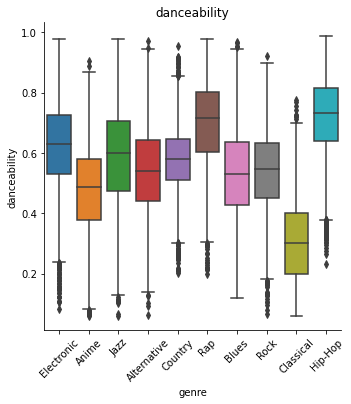

<Figure size 1008x720 with 0 Axes>

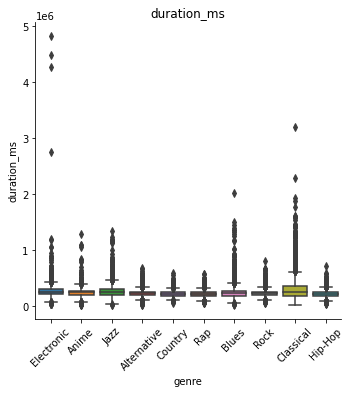

<Figure size 1008x720 with 0 Axes>

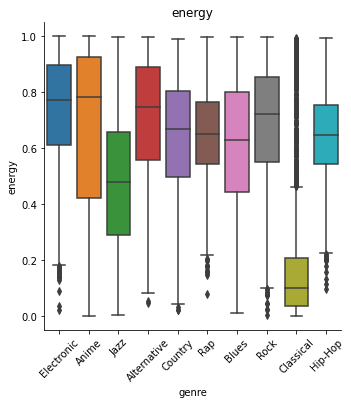

<Figure size 1008x720 with 0 Axes>

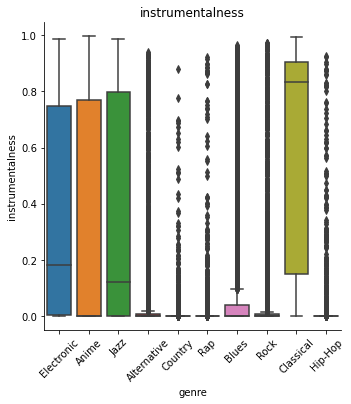

<Figure size 1008x720 with 0 Axes>

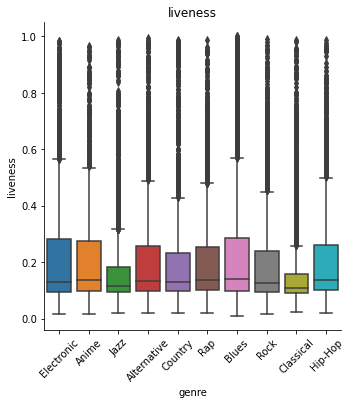

<Figure size 1008x720 with 0 Axes>

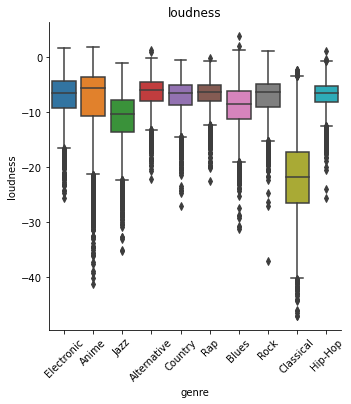

<Figure size 1008x720 with 0 Axes>

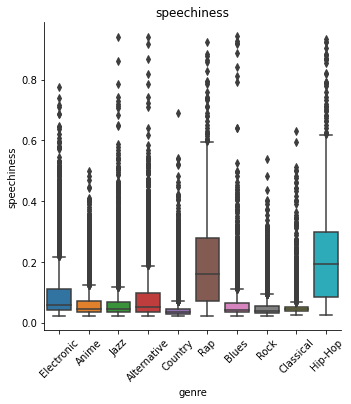

<Figure size 1008x720 with 0 Axes>

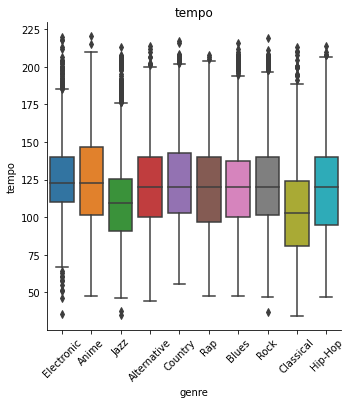

<Figure size 1008x720 with 0 Axes>

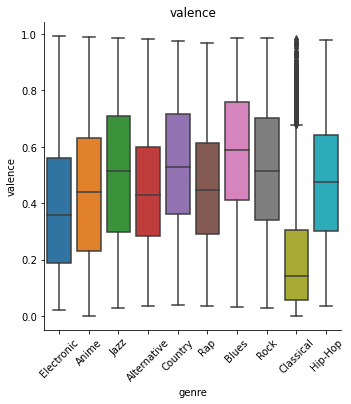

In [83]:
for col in X.columns:
    plt.figure(figsize=(14,10))
    ax = sns.catplot(x="genre", y=col, kind="box", data=summarydata)
    ax.set_xticklabels(rotation=45)
    plt.title(col)

#Classical Music looks very different

In [84]:
#splitting data into training and testing data for machine learning algorithms
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 10)

# 3. K-Means Clustering

In [85]:
kmeanscluster = KMeans(n_clusters=10, random_state = 100) #10 expected clusters for genres
kmeanscluster.fit(X) #all data is used due to unsupervised analysis

kmcluster_pred = kmeanscluster.fit_predict(X)

#print("K-Means Clustering 10 Clusters Genre Accuracy: " + str(accuracy_score(y,km_pred)))

In [86]:
pd.Series(kmcluster_pred).value_counts() #should be uniform 5000 inputs to match genre classification

3    16281
1    12527
8     8282
9     6574
7     2681
0     2459
6      892
4      233
2       66
5        5
dtype: int64

After cycling through 6-14 cluster centers and not finding any consistency, it can be concluded that the value counts are too disproportionate to follow genre distribution. Consequently, there are other stronger factors than genres in this data set.

# 4. Support Vector Machines

In [87]:
Scale = StandardScaler()
Scale.fit(Xtrain)
Xtrain_scale = Scale.transform(Xtrain)
Xtest_scale = Scale.transform(Xtest)

dec = decomposition.PCA()
dec.fit(Xtrain_scale)
Xtrain_norm = dec.transform(Xtrain_scale)

Xtest_norm = dec.transform(Xtest_scale) #applying normalization of pca to training data

In [88]:
try: #if already ran and saved
    svmmodel = pickle.load(open('svm_model2.sav', 'rb')) #open saved model
except FileNotFoundError: #if no saved file, recreate model
    #GridSearch
    #SVM GridSearch does not do well with the 50000 observations for non-lienar observations; so it is set to linear
    svm_param = {'C': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0]} #parameters to test for svm
    svm_gs = GridSearchCV(SVC(degree = 1, gamma = 5, kernel = 'linear'), svm_param, cv=3, n_jobs=10,
                          return_train_score=True, scoring='accuracy', verbose=2) #fit grid search with parameters
    svm_gs.fit(Xtrain_norm, ytrain) #fit grid search with data
    print("Best parameters: " + str(svm_gs.best_params_))
    print("Best cross-validation score: " + str(svm_gs.best_score_))
    #ActualModel
    svmmodel = SVC(**svm_gs.best_params_) #using model with best parameters
    svmmodel.fit(Xtrain_norm, ytrain) #training model

svm_pred = svmmodel.predict(Xtest_norm) #getting testing set predictions

Fitting 3 folds for each of 11 candidates, totalling 33 fits
Best parameters: {'C': 10.0}
Best cross-validation score: 0.5342284531137272


In [89]:
print("SVM Training Set Accuracy:", accuracy_score(ytrain,svmmodel.predict(Xtrain_norm)))
print("SVM Testing Set Accuracy:", accuracy_score(ytest,svm_pred))

SVM Training Set Accuracy: 0.6483142857142857
SVM Testing Set Accuracy: 0.5778


[Text(0, 0.5, 'Hip-Hop'),
 Text(0, 1.5, 'Rap'),
 Text(0, 2.5, 'Alternative'),
 Text(0, 3.5, 'Electronic'),
 Text(0, 4.5, 'Country'),
 Text(0, 5.5, 'Blues'),
 Text(0, 6.5, 'Classical'),
 Text(0, 7.5, 'Rock'),
 Text(0, 8.5, 'Anime'),
 Text(0, 9.5, 'Jazz')]

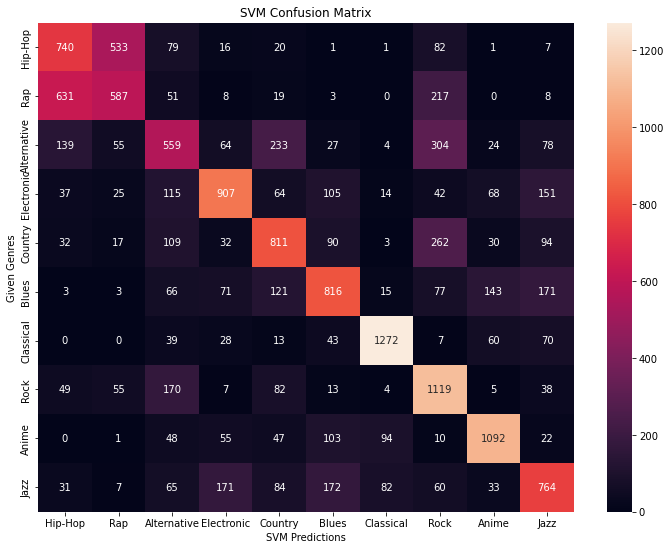

In [90]:
#SVM Confusion Matrix
plt.figure(figsize=(12,9))
ax = plt.subplot()
sns.heatmap(confusion_matrix(ytest, svm_pred, labels=list(set(ytest))), annot=True, fmt='g', ax = ax)
ax.set_xlabel('SVM Predictions')
ax.set_ylabel('Given Genres'); 
ax.set_title('SVM Confusion Matrix')
ax.xaxis.set_ticklabels(list(set(ytest)))
ax.yaxis.set_ticklabels(list(set(ytest)))

In [91]:
svmfilename = 'svm_model.sav'
pickle.dump(svmmodel, open(svmfilename, 'wb')) #save model

# 5. Decision Tree Classifier

In [92]:
#similar method to svm
try:
    treemodel = pickle.load(open('dtc_model2.sav', 'rb'))
except FileNotFoundError:
    #GridSearch
    dtc_param = {'criterion': ["gini", "entropy"],
              'max_depth': [6,8,9,10,12,14],
              'min_samples_split': [2,4,8],
              'min_samples_leaf': [1,2,4]} #parameters to test for Decision Tree Classifier
    dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_param, cv=3, n_jobs=10,
                          return_train_score=True, scoring='accuracy', verbose=2)
    dtc_gs.fit(Xtrain_norm, ytrain)
    print("Best parameters: " + str(dtc_gs.best_params_))
    print("Best cross-validation score: " + str(dtc_gs.best_score_))
    #ActualModel
    treemodel = DecisionTreeClassifier(**dtc_gs.best_params_)
    treemodel.fit(Xtrain,ytrain)

dt_pred = treemodel.predict(Xtest)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation score: 0.4551428187011757


In [93]:
print("Decision Tree Training Accuracy: " + str(accuracy_score(ytrain,treemodel.predict(Xtrain))))
print("Decision Tree Testing Accuracy: " + str(accuracy_score(ytest,dt_pred)))

Decision Tree Training Accuracy: 0.5951142857142857
Decision Tree Testing Accuracy: 0.5256666666666666


[Text(0, 0.5, 'Hip-Hop'),
 Text(0, 1.5, 'Rap'),
 Text(0, 2.5, 'Alternative'),
 Text(0, 3.5, 'Electronic'),
 Text(0, 4.5, 'Country'),
 Text(0, 5.5, 'Blues'),
 Text(0, 6.5, 'Classical'),
 Text(0, 7.5, 'Rock'),
 Text(0, 8.5, 'Anime'),
 Text(0, 9.5, 'Jazz')]

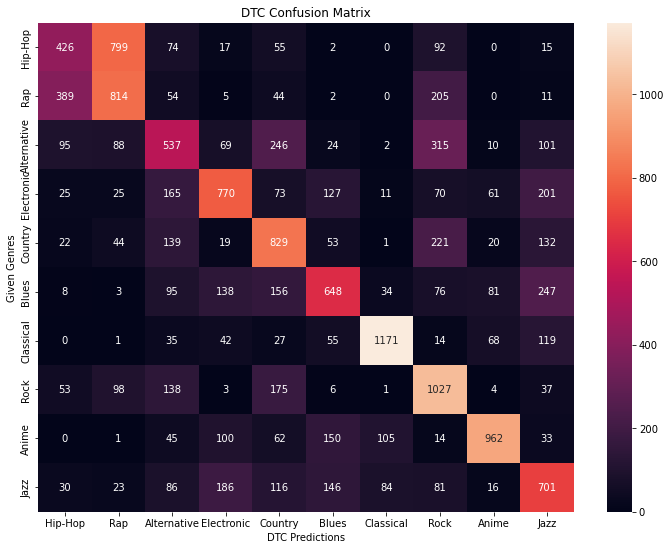

In [94]:
#Decision Tree Confusion Matrix
plt.figure(figsize=(12,9))
ax = plt.subplot()
sns.heatmap(confusion_matrix(ytest, dt_pred, labels=list(set(ytest))), annot=True, fmt='g', ax = ax)
ax.set_xlabel('DTC Predictions')
ax.set_ylabel('Given Genres'); 
ax.set_title('DTC Confusion Matrix')
ax.xaxis.set_ticklabels(list(set(ytest)))
ax.yaxis.set_ticklabels(list(set(ytest)))

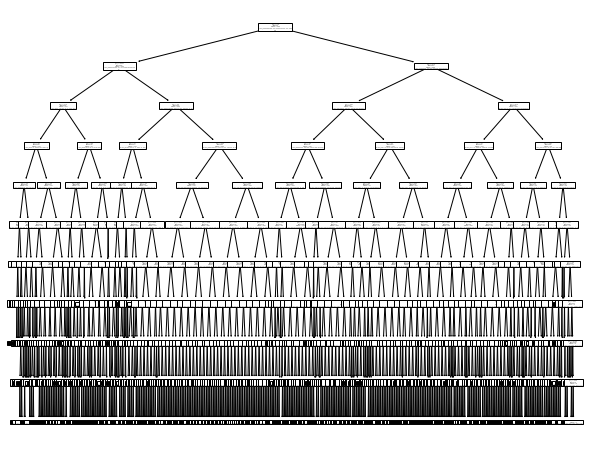

In [95]:
fig = plt.figure(figsize=(10,8))
treeresult = tree.plot_tree(treemodel) #tree diagram; does not show much due to depth

In [96]:
dtcfilename = 'dtc_model.sav'
pickle.dump(treemodel, open(dtcfilename, 'wb'))

# 6. Naive Bayes

In [97]:
try:
    nbmmodel = pickle.load(open('nbm_model2.sav', 'rb'))
except FileNotFoundError:
    #GridSearch
    nbm_param = {'alpha': [0.0001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
            'fit_prior': [True, False]} #parameters to test for Decision Tree Classifier
    nbm_gs = GridSearchCV(MultinomialNB(), nbm_param, cv=3, n_jobs=10,
                          return_train_score=True, scoring='accuracy', verbose=2)
    nbm_gs.fit(Xtrain.drop(columns='loudness'), ytrain)
    print("Best parameters: " + str(nbm_gs.best_params_))
    print("Best cross-validation score: " + str(nbm_gs.best_score_))
    #ActualModel
    nbmmodel = MultinomialNB()
    nbmmodel.fit(Xtrain.drop(columns="loudness"),ytrain) #loudness is negative
    
nbm_pred = nbmmodel.predict(Xtest.drop(columns="loudness"))

Fitting 3 folds for each of 22 candidates, totalling 66 fits
Best parameters: {'alpha': 0.0001, 'fit_prior': True}
Best cross-validation score: 0.26219999308094516


In [98]:
print("Naive Bayes Training Accuracy: " + str(accuracy_score(ytrain,nbmmodel.predict(Xtrain.drop(columns="loudness")))))
print("Naive Bayes Testing Accuracy: " + str(accuracy_score(ytest,nbm_pred)))

Naive Bayes Training Accuracy: 0.2626
Naive Bayes Testing Accuracy: 0.2663333333333333


[Text(0, 0.5, 'Hip-Hop'),
 Text(0, 1.5, 'Rap'),
 Text(0, 2.5, 'Alternative'),
 Text(0, 3.5, 'Electronic'),
 Text(0, 4.5, 'Country'),
 Text(0, 5.5, 'Blues'),
 Text(0, 6.5, 'Classical'),
 Text(0, 7.5, 'Rock'),
 Text(0, 8.5, 'Anime'),
 Text(0, 9.5, 'Jazz')]

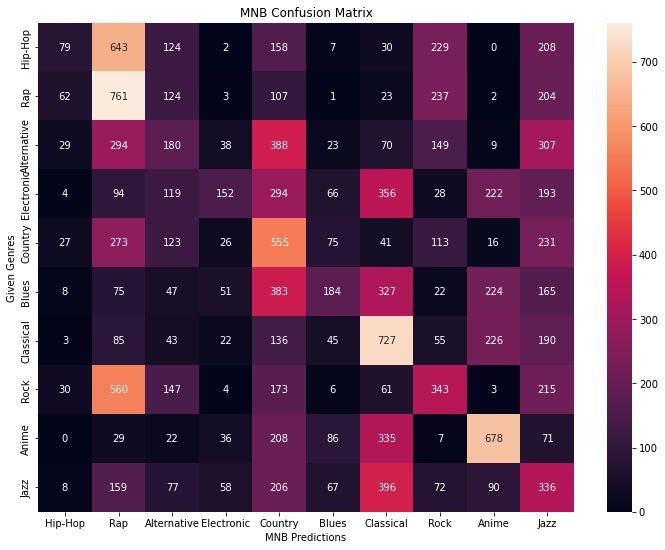

In [99]:
#Naive Bayes Confusion Matrix
plt.figure(figsize=(12,9))
ax = plt.subplot()
sns.heatmap(confusion_matrix(ytest, nbm_pred, labels=list(set(ytest))), annot=True, fmt='g', ax = ax)
ax.set_xlabel('MNB Predictions')
ax.set_ylabel('Given Genres'); 
ax.set_title('MNB Confusion Matrix')
ax.xaxis.set_ticklabels(list(set(ytest)))
ax.yaxis.set_ticklabels(list(set(ytest)))

In [100]:
nbmfilename = 'nbm_model.sav'
pickle.dump(nbmmodel, open(nbmfilename, 'wb'))